In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
# Get the seed
import numpy as np
np.random.seed(2676)

In [2]:
# Get the data
all_data = pd.read_csv("input_data/model_ready_data.csv")

### Test/Train Split

In [3]:
# Get the y and x data in different variables
y_label = all_data["PRICE"]
X_data = all_data.drop(columns=["PRICE"])

# Split the data into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_data, y_label, test_size=0.3, random_state=43)

In [4]:
print(f"X Train Data Length = {len(train_X)} \t\t X Test Data Length = {len(test_X)} \n Y Train Data Length = {len(train_y)} \t\t Y Test Data Length = {len(test_y)}")

X Train Data Length = 3357 		 X Test Data Length = 1440 
 Y Train Data Length = 3357 		 Y Test Data Length = 1440


### Random Forest Decision Tree Model

In [5]:
# Set model for regression
rf_df_model = RandomForestRegressor(n_estimators=100, random_state=30)

# Fit model
rf_df_model.fit(train_X, train_y)

RandomForestRegressor(random_state=30)

In [6]:
# Make predictions
y_pred = rf_df_model.predict(test_X)

### Model Prediction Statistics

In [7]:
# Mean Squared Error (MSE)
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

# Coefficient of Determination (R-squared)
r_squared = r2_score(test_y, y_pred)
print(f'Coefficient of Determination (R-squared): {r_squared}')

# Mean Absolute Error (MAE)
mae = mean_absolute_error(test_y, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test_y, y_pred))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Define the number of folds (k)
# You can adjust this based on your preference
num_folds = 5  

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform k-fold cross-validation for R-squared
cross_val_r_squared = cross_val_score(rf_df_model, train_X, train_y, cv=kf, scoring='r2')

# Display the results
print(f'K-fold Cross-validated R-squared: {np.mean(cross_val_r_squared)}')

Mean Squared Error (MSE): 19786986453552.14
Coefficient of Determination (R-squared): -0.23666527263700177
Mean Absolute Error (MAE): 1028246.8320625001
Root Mean Squared Error (RMSE): 4448256.563368635
K-fold Cross-validated R-squared: -0.10716566296113068


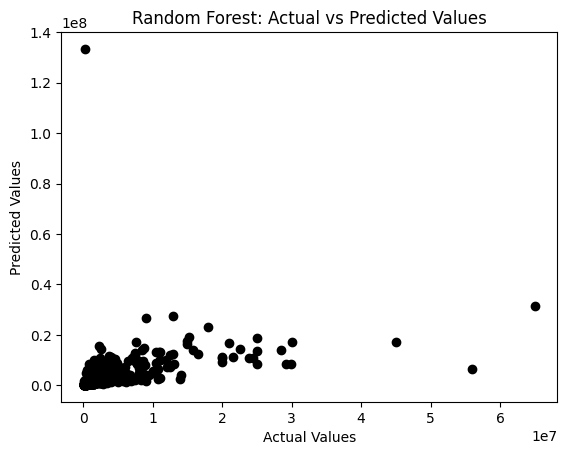

In [10]:
# Plot outputs
plt.scatter(test_y, y_pred, color="black")

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted Values")
plt.savefig('output/random_forest.jpg')
plt.show()

In [9]:
# Get feature importances
feature_importances = rf_df_model.feature_importances_

# Create a DataFrame to display the feature importances
coeff = pd.DataFrame(list(zip(train_X.columns, feature_importances)), columns=['Feature', 'Importance'])
coeff.sort_values('Importance', ascending=False, inplace=True)

# Print the sorted DataFrame
print(coeff)

                        Feature  Importance
8                  MAIN_ADDRESS    0.140605
12                  STREET_NAME    0.125416
4                          BATH    0.099407
0                    Unnamed: 0    0.093701
14            FORMATTED_ADDRESS    0.085523
6                       ADDRESS    0.082147
13                    LONG_NAME    0.057896
2                          TYPE    0.052437
7                         STATE    0.045516
3                          BEDS    0.036261
5                  PROPERTYSQFT    0.034386
1                   BROKERTITLE    0.034308
11                  SUBLOCALITY    0.026726
10                     LOCALITY    0.025331
9   ADMINISTRATIVE_AREA_LEVEL_2    0.021425
15                     LATITUDE    0.019768
16                    LONGITUDE    0.019148
